# Descriptive Analysis Superstore Dataset

> Importing Libraries

In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt



> Data Loading



In [ ]:
#using pandas to load the csv file
data = pd.read_csv('Superstore.csv', encoding='windows-1252')
# showing the top 5 rows
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164




> Data Overview



In [ ]:
#Find the shape of data
print('The data shap is:', data.shape)

The data shap is: (9994, 21)


In [ ]:
# Find the discription information about data
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# make the data columns as datetime datatype
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

#make columns year-month for order and ship
data['order_month_year'] = data['Order Date'].dt.to_period('M')
data['ship_month_year'] = data['Ship Date'].dt.to_period('M')

In [ ]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID            9994 non-null   int64         
 1   Order ID          9994 non-null   object        
 2   Order Date        9994 non-null   datetime64[ns]
 3   Ship Date         9994 non-null   datetime64[ns]
 4   Ship Mode         9994 non-null   object        
 5   Customer ID       9994 non-null   object        
 6   Customer Name     9994 non-null   object        
 7   Segment           9994 non-null   object        
 8   Country           9994 non-null   object        
 9   City              9994 non-null   object        
 10  State             9994 non-null   object        
 11  Postal Code       9994 non-null   int64         
 12  Region            9994 non-null   object        
 13  Product ID        9994 non-null   object        
 14  Category          9994 n

In [ ]:
# Find the duplications
if data.duplicated().any== True:
    print(count())
else:
    print('The duplications is',0)

The duplications is 0


1. The Average Sales across different Regions.

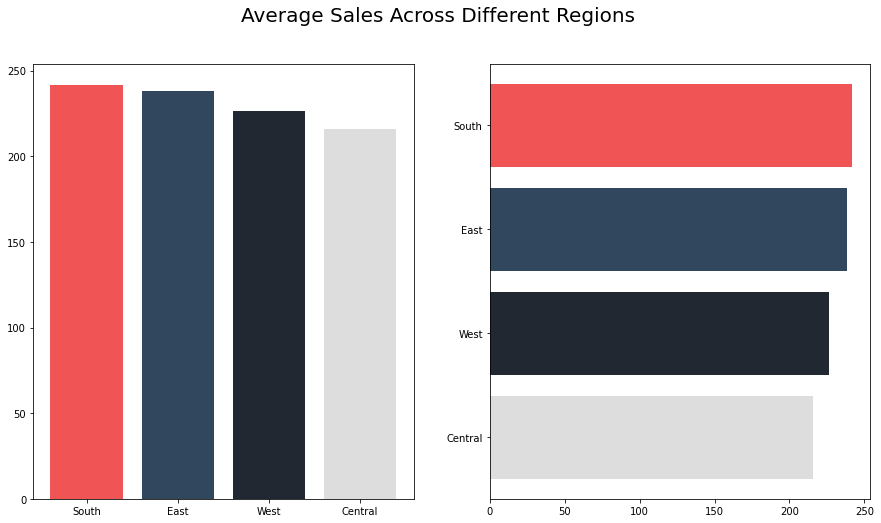

In [ ]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_bar = data[['Region','Sales']]

# Grouping the DataFrame based on Regions and taking mean of profit across each of them.
# The reason for sorting is to show the larger values at the beginning (Best Practice)
df_bar = df_bar.groupby('Region').mean().sort_values(by='Sales', ascending=False)

plt.figure(figsize=[15,8]) # Setting the figure size

# Visualizing using Bar Chart
plt.suptitle("Average Sales Across Different Regions", size=20)

# Plotting the BarChart
plt.subplot(1,2,1)
plt.bar(x=df_bar.index, height='Sales', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)

# Plotting the Horizontal BarChart (Use this if there are many unique values for a Categorical Feature)
plt.subplot(1,2,2)
plt.barh(y=df_bar.index, width='Sales', color=['#F05454','#30475E','#222831','#DDDDDD'], data=df_bar)
plt.gca().invert_yaxis() # Inverting the Y Axis

plt.show()

2. The trend for Average Profit and Sales across all these years

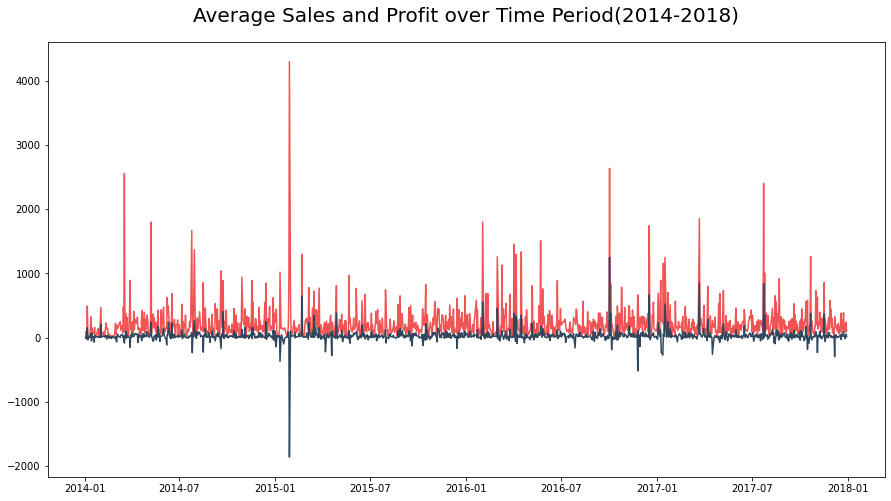

In [ ]:
# First of all, we are going to take only the subset of data for our purpose. (To keep things simple)
df_line = data[['Order Date','Sales','Profit']].sort_values('Order Date') # Chronological Ordering
df_line['Order Date'] = pd.to_datetime(df_line['Order Date']) # Converting into DateTime
df_line = df_line.groupby('Order Date').mean() # Groupby to get the average Sales and Profit on each day

# Visualizing the Line Chart
plt.figure(figsize=[15,8])
plt.plot(df_line.index, 'Sales', data=df_line, color='#F05454') # Avg Sales over Time
plt.plot(df_line.index, 'Profit', data=df_line, color='#30475E') # Avg Profit over Time
plt.title("Average Sales and Profit over Time Period(2014-2018)", size=20, pad=20)

plt.show()

3. how the Sales impact Profit for different Customer Segments.

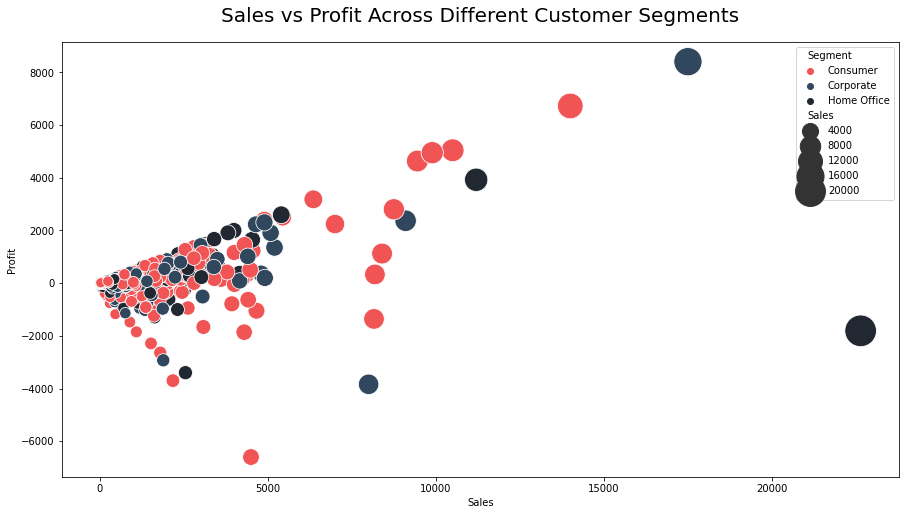

In [ ]:
# Again taking a subset of data (To keep things simple)
df_scatter = data[['Sales','Profit','Segment']]

# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volumen of "Sales".
sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'], palette=['#F05454','#30475E','#222831'], size=df_scatter["Sales"], sizes=(100,1000), legend='auto') 
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

4. Whats is top demanded product United States?

In [ ]:
# Grouping by product name and its catagory
most_demand_qty = pd.DataFrame(data.groupby(['Product Name', 'Category'])['Quantity'].sum()).reset_index()

# Sorting the product in descending order 
most_demand_qty.sort_values(by='Quantity', ascending=False, inplace=True)

#show top 5 product demanded by customers
most_demand_qty.head()

,Product Name,Category,Quantity
1499,Staples,Office Supplies,215
1493,Staple envelope,Office Supplies,170
537,Easy-staple paper,Office Supplies,150
1500,Staples in misc. colors,Office Supplies,86
942,KI Adjustable-Height Table,Furniture,74


In [ ]:
# Grouping by Catgory of the product and find the total sum of all quantity of the catagory
top_catagory  = pd.DataFrame(most_demand_qty.groupby('Category')['Quantity'].sum()).reset_index()

#Sorting the DataFrame by Quantity in descending mode
top_catagory.sort_values(by='Quantity', ascending=False, inplace=True)

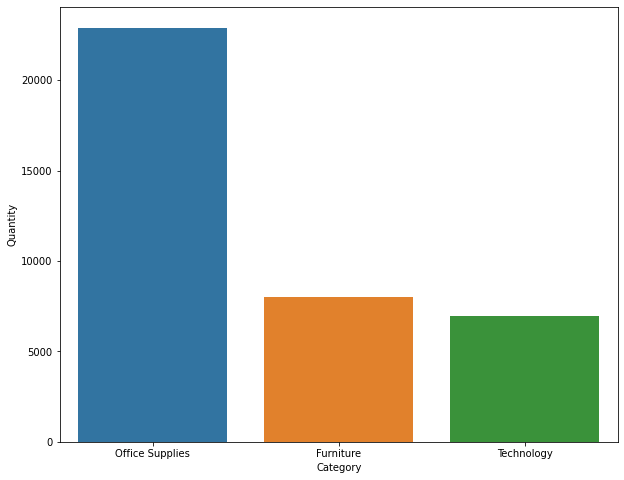

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_catagory, x="Category",y = 'Quantity')
plt.show()

5. How many customers the store have and what is top 10 customers profit percentage?

In [ ]:
# creat dataframe and group the data by customer id with its name
num_custs = pd.DataFrame(data. groupby('Customer ID')['Customer Name'].unique()).reset_index()
print ('The Number of customers the store have is:', len(num_custs))

The Number of customers the store have is: 793


In [ ]:
top_10_cut = pd.DataFrame(data.groupby(['Customer ID','Customer Name', 'City'])[['Quantity', 'Profit']].sum()).reset_index()
top_10_cut.sort_values(by='Profit',ascending=False, inplace=True)
top_10_cut = top_10_cut.head(10)
top_10_cut

,Customer ID,Customer Name,City,Quantity,Profit
4367,TC-20980,Tamara Chand,Lafayette,18,8762.3891
3646,RB-19360,Raymond Buch,Seattle,9,6734.4720
1909,HL-15040,Hunter Lopez,Newark,3,5039.9856
35,AB-10105,Adrian Barton,Detroit,13,4946.3700
3926,SC-20095,Sanjit Chand,Minneapolis,17,4668.6935
4306,TA-21385,Tom Ashbrook,New York City,22,4599.2073
915,CM-12385,Christopher Martinez,Atlanta,12,3192.0682
4011,SE-20110,Sanjit Engle,Arlington,20,2825.2862
1355,DR-12940,Daniel Raglin,Providence,13,2640.4798
286,AR-10540,Andy Reiter,Jackson,14,2602.0939


In [ ]:
overall_profit = sum(data['Profit'])
print('The overall Product is:', overall_profit)

The overall Product is: 286397.0217000013


6. What is favorite shiping mood for the customers?

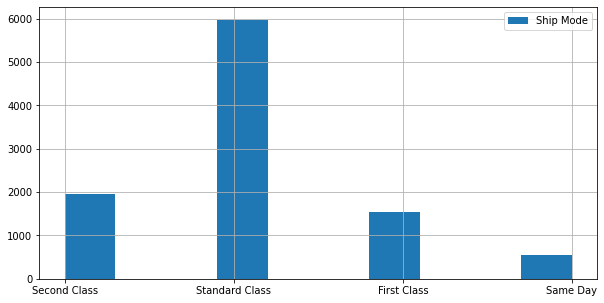

In [ ]:
data['Ship Mode'].hist(figsize=(10, 5), legend=True)